This notebook compares the secret key fraction of the following protocols:
- Coherent states protocol with heterodyne detection at Alice and Bob;
- Coherent states protocol with homodyne detection at Alice and Bob and 50% quadrature switching;
- Unidimensional squeezed states protocol with modulation of the squeezed quadrature, and an assumed state monitor at Alice and Bob for the unmodulated quadrature

In [1]:
import numpy
import matplotlib
from scipy.optimize import fminbound
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib widget
from matplotlib import font_manager
from ipywidgets import *
from Iaji.Physics.Theory.QuantumMechanics.QuanutmInformation.QuantumCommunications.QuantumKeyDistribution.ContinuousVariables.GaussianStatesQKD.Utilities import *

In [2]:
#%%
#Close all figures
plt.close('all')
#%%
#General plot settings
default_marker = ""
default_figure_size = (10, 7)
default_fontsize = 24
title_fontsize = default_fontsize
title_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=title_fontsize)
axis_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=title_fontsize*0.7)
legend_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=int(numpy.floor(0.9*title_fontsize)))

In [3]:
#%%
#Colormaps for surface or contour plots
c1 = [(0.,'#ffffff'), (1/3.,'#FEFEFE'), (1,'#CC0000')]
c2 = [(0.,'#ffffff'), (0.1,'#0C50B7'), (0.2,'#2765C2'), (0.3,'#5889D3'), \
      (0.4,'#A2BEE8'), (0.49,'#FFFFFF'), (0.51,'#FFFFFF'), (0.6,'#E8A2A2'), \
      (0.7,'#D35858'), (0.8,'#C22727'), (0.9,'#B70C0C'), (1.,'#B20000')]
c3 = [(0.,'#ffffff'), (0.1,'#0C50B7'), (0.2,'#2765C2'), (0.3,'#5889D3'), \
      (0.4,'#A2BEE8'), (0.49,'#F9F9F9'), (0.51,'#F9F9F9'), (0.6,'#E8A2A2'), \
      (0.7,'#D35858'), (0.8,'#C22727'), (0.9,'#B70C0C'), (1.,'#B20000')]
cmwig1 = matplotlib.colors.LinearSegmentedColormap.from_list('cmwig1',c2)
cmwig2 = matplotlib.colors.LinearSegmentedColormap.from_list('cmwig2',c3)

In [4]:
#Channel efficiencies
eta = numpy.linspace(10**(-2), 1, 500)
fiber_attenuation_coefficient = 0.2 #[dB/km]
eta_to_attenuation_dB = lambda eta: -10*numpy.log10(eta)
attenuation_dB = eta_to_attenuation_dB(eta)
eta_to_distance = lambda eta: eta_to_attenuation_dB(eta)/0.2
distance = eta_to_distance(eta)

## Secret Key Fraction VS Channel Loss

/home/jiedz/Jiedz/University/PhD-@-DTU/Software/Python/Iaji/Iaji-master/Iaji/Physics/Theory/QuantumMechanics/QuanutmInformation/QuantumCommunications/QuantumKeyDistribution/ContinuousVariables/GaussianStatesQKD/Utilities.py:20: RuntimeWarning: divide by zero encountered in log2
  return -numpy.log2(1-(channel_total_efficiency)**(1/L))
/tmp/ipykernel_33550/1170541024.py:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis_secret_key_fraction.semilogy(attenuation_dB, kappa_PLOB, label="PLOB bound", color="black", linewidth=3)


interactive(children=(FloatSlider(value=1.17, description='modulation_variance', layout=Layout(height='40px', …

interactive(children=(FloatSlider(value=1.17, description='modulation_variance', layout=Layout(height='40px', …

interactive(children=(FloatSlider(value=1.17, description='modulation_variance', layout=Layout(height='40px', …

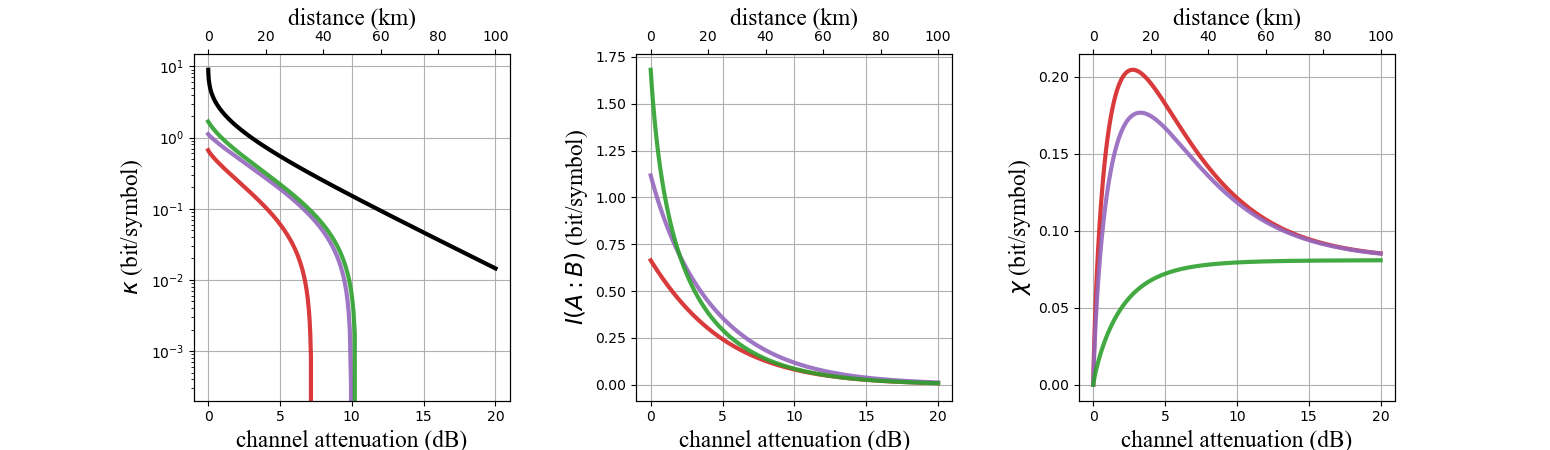

In [5]:
figure = plt.figure(num="QKD system performance VS distance", figsize = (15.5, 4.5))
figure.subplots_adjust(wspace=0.4, hspace=0.7) 
#Secret key fraction plot
axis_secret_key_fraction = figure.add_subplot(1, 3, 1)
axis_secret_key_fraction.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_secret_key_fraction.set_ylabel("$\kappa$ (bit/symbol)", font=axis_font)
axis_distance = axis_secret_key_fraction.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
axis_secret_key_fraction.grid(True)
#Mutual information plot
axis_mutual_information = figure.add_subplot(1, 3, 2)
axis_mutual_information.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_mutual_information.set_ylabel("$I(A:B)$ (bit/symbol)", font=axis_font)
axis_mutual_information.grid(True)
axis_distance = axis_mutual_information.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
#Holevo Information plot
axis_Holevo_information = figure.add_subplot(1, 3, 3)
axis_Holevo_information.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_Holevo_information.set_ylabel("$\chi$ (bit/symbol)", font=axis_font)
axis_Holevo_information.grid(True)
axis_distance = axis_Holevo_information.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
#Plot the PLOB bound on the secret key fraction
kappa_PLOB = secret_key_fraction_lossy_channel_bound(channel_total_efficiency=eta, L=1)
axis_secret_key_fraction.semilogy(attenuation_dB, kappa_PLOB, label="PLOB bound", color="black", linewidth=3)
#Coherent states protocol
def plot_coherent_states(modulation_variance, n_q, n_p, beta, persistent_plot):
    V_S = modulation_variance
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    variances_A = [1+V_S, 1+V_S]
    correlations_A = [c_S, c_S]
    channel_thermal_numbers = [n_q, n_p]
    kappa = numpy.zeros((len(eta),))
    I_AB = numpy.zeros((len(eta),))
    chi = numpy.zeros((len(eta),))
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa[j], I_AB[j], chi[j], _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, channel_thermal_numbers, beta)
    if persistent_plot:
        n_lines = (len(axis_mutual_information.lines)-1)/3
        alpha = 0.9*numpy.exp(-float(n_lines)/30)
        axis_secret_key_fraction.semilogy(attenuation_dB, kappa, color="tab:red", linewidth=3, alpha=alpha)
        axis_mutual_information.plot(attenuation_dB, I_AB, color="tab:red", linewidth=3, alpha=alpha)
        axis_Holevo_information.plot(attenuation_dB, chi, color="tab:red", linewidth=3, alpha=alpha)
    else:
        axis_secret_key_fraction.lines[1].set_ydata(kappa)
        axis_mutual_information.lines[0].set_ydata(I_AB)
        axis_Holevo_information.lines[0].set_ydata(chi)
#Interactive plot updates
#--------------------------------
def update_coherent_states(modulation_variance, n_q, n_p, error_correction_efficiency, persist):
    persistent_plot = persist == "persistent plot"
    plot_coherent_states(modulation_variance, n_q, n_q, error_correction_efficiency, persistent_plot)
    figure.canvas.draw_idle()   
coherent_states_layout = Layout(width='25%', height='40px')
modulation_variance_slider = FloatSlider(min=1e-3, max=20, step=0.001, value=1.17, readout_format='.3f', layout=coherent_states_layout)
n_q_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0.01, readout_format='.3f', layout=coherent_states_layout)
n_p_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0.01, readout_format='.3f', layout=coherent_states_layout)
beta_slider = FloatSlider(min=0, max=1, step=0.02, value=1, readout_format='.3f', layout=coherent_states_layout)
persist_button = RadioButtons(options=["single plot", "persistent plot"], layout=coherent_states_layout, value="persistent plot")
interact(update_coherent_states, modulation_variance=modulation_variance_slider, \
         n_q=n_q_slider, n_p=n_p_slider, error_correction_efficiency=beta_slider, persist=persist_button)
#---------------------------------------------------------------------------------------------------
#Coherent states protocol with switching
def plot_coherent_states_switching(modulation_variance, n_q, n_p, beta, switching_probability, persistent_plot):
    V_S = modulation_variance
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    variances_A = [1+V_S, 1+V_S]
    correlations_A = [c_S, c_S]
    channel_thermal_numbers = [n_q, n_p]
    kappa = numpy.zeros((len(eta),))
    I_AB = numpy.zeros((len(eta),))
    chi = numpy.zeros((len(eta),))
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa[j], I_AB[j], chi[j], _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, channel_thermal_numbers, beta, switching_probability=switching_probability)
    if persistent_plot:
        n_lines = (len(axis_mutual_information.lines)-1)/3
        alpha = 0.9*numpy.exp(-float(n_lines)/30)
        axis_secret_key_fraction.semilogy(attenuation_dB, kappa, color="tab:purple", linewidth=3, alpha=alpha)
        axis_mutual_information.plot(attenuation_dB, I_AB, color="tab:purple", linewidth=3, alpha=alpha)
        axis_Holevo_information.plot(attenuation_dB, chi, color="tab:purple", linewidth=3, alpha=alpha)
    else:
        axis_secret_key_fraction.lines[2].set_ydata(kappa)
        axis_mutual_information.lines[1].set_ydata(I_AB)
        axis_Holevo_information.lines[1].set_ydata(chi)
#Interactive plot updates
#--------------------------------
def update_coherent_states_switching(modulation_variance, n_q, n_p, error_correction_efficiency, switching_probability, persist):
    persistent_plot = persist == "persistent plot"
    plot_coherent_states_switching(modulation_variance, n_q, n_q, error_correction_efficiency, switching_probability, persistent_plot)
    figure.canvas.draw_idle()   
coherent_states_switching_layout = Layout(width='25%', height='40px')
modulation_variance_slider = FloatSlider(min=1e-3, max=20, step=0.001, value=1.17, readout_format='.3f', layout=coherent_states_switching_layout)
#n_q_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f', layout=coherent_states_switching_layout)
#n_p_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f', layout=coherent_states_switching_layout)
#beta_slider = FloatSlider(min=0, max=1, step=0.001, value=1, readout_format='.3f', layout=coherent_states_switching_layout)
switching_probability_slider = FloatSlider(min=0, max=1, step=0.001, value=0.5, readout_format='.3f', layout=coherent_states_switching_layout)
#persist_button = RadioButtons(options=["single plot", "persistent plot"], layout=coherent_switching_states_layout, value="persistent plot")
interact(update_coherent_states_switching, modulation_variance=modulation_variance_slider, \
         n_q=n_q_slider, n_p=n_p_slider, error_correction_efficiency=beta_slider, \
         switching_probability=switching_probability_slider, persist=persist_button)
#---------------------------------------------------------------------------------------------------
#Squeezed states QKD with squeezed quadrature modulation
def plot_squeezed_states(modulation_variance, squeezing_variance, n_q, n_p, beta, persistent_plot):
    V_S = modulation_variance
    V_sqz = squeezing_variance
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    variances_A = [1/V_sqz, V_sqz+V_S]
    correlations_A = [0, c_S]
    channel_thermal_numbers = [n_q, n_p]
    kappa = numpy.zeros((len(eta),))
    I_AB = numpy.zeros((len(eta),))
    chi = numpy.zeros((len(eta),))
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa[j], I_AB[j], chi[j], _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, channel_thermal_numbers, beta)
    if persistent_plot:
        n_lines = (len(axis_mutual_information.lines)-1)/3
        alpha = 0.9*numpy.exp(-float(n_lines)/30)
        axis_secret_key_fraction.semilogy(attenuation_dB, kappa, color="tab:green", linewidth=3, alpha=alpha)
        axis_mutual_information.plot(attenuation_dB, I_AB, color="tab:green", linewidth=3, alpha=alpha)
        axis_Holevo_information.plot(attenuation_dB, chi, color="tab:green", linewidth=3, alpha=alpha)
    else:
        print(axis_mutual_information.lines)
        axis_secret_key_fraction.lines[3].set_ydata(kappa)
        axis_mutual_information.lines[2].set_ydata(I_AB)
        axis_Holevo_information.lines[2].set_ydata(chi)
#Interactive plot updates
#--------------------------------
def update_squeezed_states(modulation_variance, squeezing_variance, n_q, n_p, error_correction_efficiency, persist):
    persistent_plot = persist == "persistent plot"
    plot_squeezed_states(modulation_variance, 10**(squeezing_variance/10), n_q, n_q, error_correction_efficiency, persistent_plot)
    figure.canvas.draw_idle()   
squeezed_states_layout = Layout(width='25%', height='40px')
modulation_variance_slider = FloatSlider(min=1e-3, max=20, step=0.001, value=1.17, readout_format='.3f', layout=squeezed_states_layout)
squeezing_variance_slider = FloatSlider(min=-20, max=0, step=0.001, value=-9, readout_format='.3f', layout=squeezed_states_layout)
#beta_slider = FloatSlider(min=0, max=1, step=0.001, value=1, readout_format='.3f', layout=squeezed_states_layout)
#n_q_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f', layout=squeezed_states_layout)
#n_p_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f', layout=squeezed_states_layout)
#persist_button = RadioButtons(options=["single plot", "persistent plot"], layout=coherent_states_layout)
interact(update_squeezed_states, modulation_variance=modulation_variance_slider, squeezing_variance=squeezing_variance_slider, \
         n_q=n_q_slider, n_p=n_p_slider, error_correction_efficiency=beta_slider, persist=persist_button)
plt.show()  

In [6]:
figure.savefig("coherent-VS-squeezed_VS-loss_V_S=1.17_V_sqz=-9dB_n_q=n_p=0.01_beta=0.7-to-1.pdf")

## Secret Key Fraction VS ($n_q$, $n_p$) for the Squeezed States Protocol 
The channel efficiency is kept constant.

interactive(children=(FloatSlider(value=0.5, description='eta', max=1.0, min=1e-06, readout_format='.3f', step…

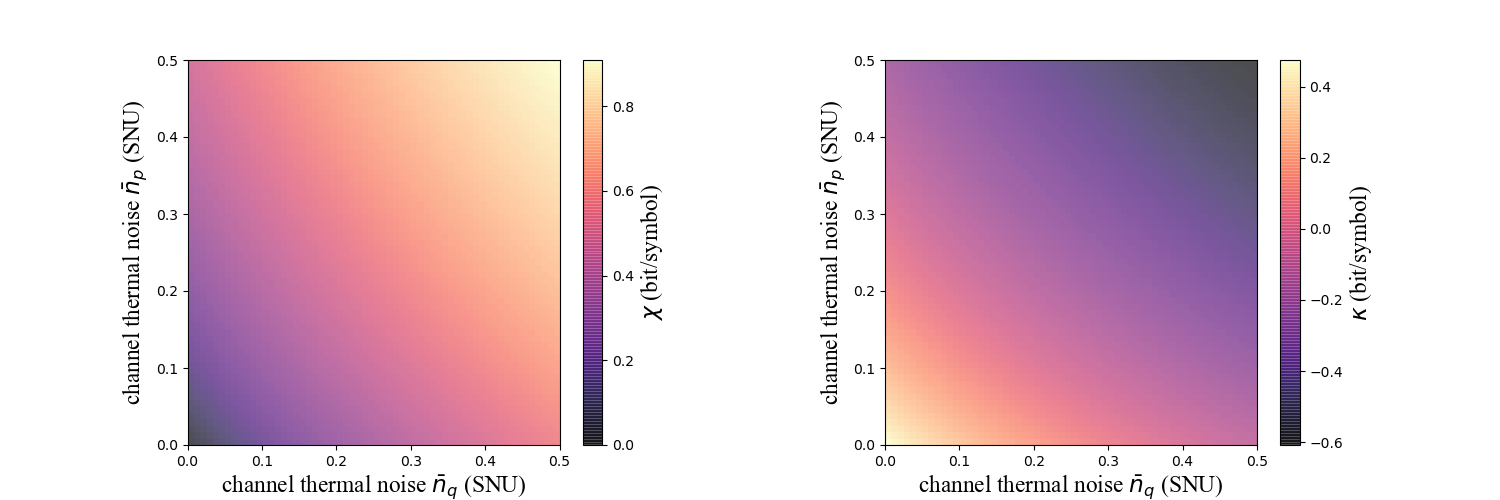

In [7]:
n_points_initial = 60
#Define figure and axes
figure_2D_channel_noise = plt.figure(figsize = (15, 5))
figure_2D_channel_noise.subplots_adjust(wspace=0.5, hspace=0.1) 

#Define plot function
def plot_VS_channel_noise(eta, V_p_S, V_sqz, n_points):
    figure_2D_channel_noise.clear()
    n_q_array = numpy.linspace(0, 0.5, n_points)
    n_p_array = numpy.linspace(0, 0.5, n_points)
    #2D plot variables
    holevo_information = numpy.zeros((n_points, n_points))
    secret_key_fraction = numpy.zeros((n_points, n_points))
    #Holevo information axis 
    axis_Holevo_information = figure_2D_channel_noise.add_subplot(1, 2, 1)
    axis_Holevo_information.set_xlabel("channel thermal noise $\\bar{n}_q$ (SNU)", font=axis_font)
    axis_Holevo_information.set_ylabel("channel thermal noise $\\bar{n}_p$ (SNU)", font=axis_font)
    #axis_Holevo_information.grid()
    #Secret key fraction axis
    axis_secret_key_fraction = figure_2D_channel_noise.add_subplot(1, 2, 2)
    axis_secret_key_fraction.set_xlabel("channel thermal noise $\\bar{n}_q$ (SNU)", font=axis_font)
    axis_secret_key_fraction.set_ylabel("channel thermal noise $\\bar{n}_p$ (SNU)", font=axis_font)
   # axis_secret_key_fraction.grid()
    for j in range(n_points):
        n_p = n_p_array[-1-j]
        for k in range(n_points):
            n_q = n_q_array[k]
            C_p_S = V_p_S #symbols/quadrature covariances
            c_p_S = C_p_S/numpy.sqrt(V_p_S) #correlations (not normalized)
            variances_A = [1/V_sqz, V_sqz+V_p_S]
            correlations_A = [0, c_p_S]
            channel_thermal_numbers = [n_q, n_p]
            etas = [eta, eta]
            kappa, I_AB, chi, _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                         etas, channel_thermal_numbers, beta=0.95)
            holevo_information[j, k] = chi
            secret_key_fraction[j, k] = kappa
    #Plot
    min_chi, max_chi = (numpy.min(holevo_information), numpy.max(holevo_information))
    imshow_chi = axis_Holevo_information.imshow(holevo_information, alpha=0.7, cmap=cm.magma, \
                                                norm=matplotlib.colors.Normalize(vmin=0, vmax=max_chi), aspect='auto', \
                                                extent=[n_q_array[0], n_q_array[-1], n_p_array[0], n_p_array[-1]])
    colorbar_chi = figure_2D_channel_noise.colorbar(mappable=imshow_chi, ax=axis_Holevo_information)
    colorbar_chi.set_label("$\chi$ (bit/symbol)", font=axis_font)
    
    min_kappa, max_kappa = (numpy.min(secret_key_fraction), numpy.max(secret_key_fraction))
    imshow_kappa = axis_secret_key_fraction.imshow(secret_key_fraction.astype(float), alpha=0.7, cmap=cm.magma, \
                                                   norm=matplotlib.colors.Normalize(vmin=min_kappa, vmax=max_kappa), aspect='auto',\
                                                   extent=[n_q_array[0], n_q_array[-1], n_p_array[0], n_p_array[-1]])
    colorbar_kappa = figure_2D_channel_noise.colorbar(mappable=imshow_kappa, ax=axis_secret_key_fraction)
    colorbar_kappa.set_label("$\kappa$ (bit/symbol)", font=axis_font)
#Interactive plot functions
def update(eta, modulation_variance, squeezing_variance, n_points):
    plot_VS_channel_noise(eta=eta, V_p_S=modulation_variance, V_sqz=10**(squeezing_variance/10), n_points=n_points)
    figure_2D_channel_noise.canvas.draw_idle()
    
interact(update, eta=FloatSlider(min=1e-6, max=1, step=0.001, value=0.5, readout_format='.3f'),\
        modulation_variance=FloatSlider(min=1e-3, max=20, step=0.001, value=1.17, readout_format='.3f'),\
        squeezing_variance=FloatSlider(min=-20, max=0, step=0.001, value=-9, readout_format='.3f'),\
        n_points = IntSlider(min=5, max=100, step=1, value=n_points_initial, readout_format='d'))
plt.show()

In [8]:
figure_2D_channel_noise.savefig("squeezed_VS-channel-noise_V_S=1.17_V_sqz=-9dB_beta=0.95.pdf")

## Optimizing Against the Coherent States Protocol (with Homodyne Detection and Quadrature Switching)
The squeezed states protocol optimizes the variance of the squeezed quadrature, $V_\text{sqz}$, for a given modulation variance $V_{p_S}$, for every channel efficiency.

The channel is considered symmetric in the loss, i.e., $\eta_q=\eta_p$.

In [9]:
#Channel efficiencies
eta = numpy.linspace(10**(-2), 1, 100)
fiber_attenuation_coefficient = 0.2 #[dB/km]
eta_to_attenuation_dB = lambda eta: -10*numpy.log10(eta)
attenuation_dB = eta_to_attenuation_dB(eta)
eta_to_distance = lambda eta: eta_to_attenuation_dB(eta)/0.2
distance = eta_to_distance(eta)

/home/jiedz/Jiedz/University/PhD-@-DTU/Software/Python/Iaji/Iaji-master/Iaji/Physics/Theory/QuantumMechanics/QuanutmInformation/QuantumCommunications/QuantumKeyDistribution/ContinuousVariables/GaussianStatesQKD/Utilities.py:20: RuntimeWarning: divide by zero encountered in log2
  return -numpy.log2(1-(channel_total_efficiency)**(1/L))
/tmp/ipykernel_33550/545169411.py:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis_secret_key_fraction.semilogy(attenuation_dB, kappa_PLOB, label="PLOB bound", color="black", linewidth=3)


interactive(children=(FloatSlider(value=0.5, description='modulation_variance', layout=Layout(height='40px', w…

interactive(children=(FloatSlider(value=0.5, description='modulation_variance', layout=Layout(height='40px', w…

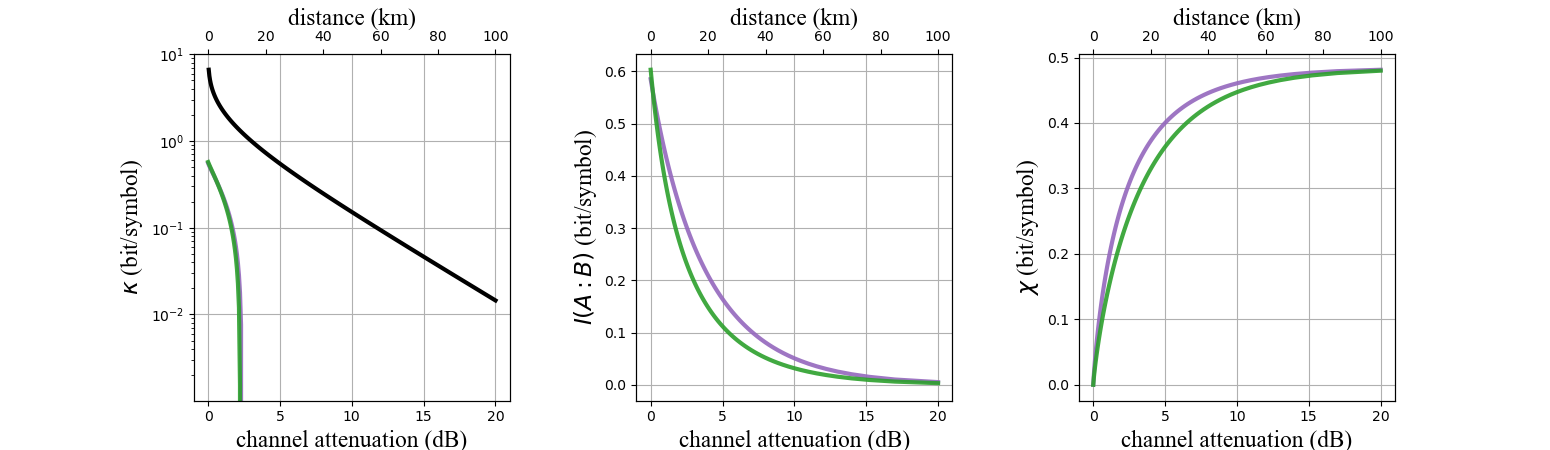

In [10]:
figure_optimized = plt.figure(figsize = (15.5, 4.5))
figure_optimized.subplots_adjust(wspace=0.4, hspace=0.7) 
#Secret key fraction plot
axis_secret_key_fraction = figure_optimized.add_subplot(1, 3, 1)
axis_secret_key_fraction.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_secret_key_fraction.set_ylabel("$\kappa$ (bit/symbol)", font=axis_font)
axis_distance = axis_secret_key_fraction.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
axis_secret_key_fraction.grid(True)
#Mutual information plot
axis_mutual_information = figure_optimized.add_subplot(1, 3, 2)
axis_mutual_information.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_mutual_information.set_ylabel("$I(A:B)$ (bit/symbol)", font=axis_font)
axis_mutual_information.grid(True)
axis_distance = axis_mutual_information.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
#Holevo Information plot
axis_Holevo_information = figure_optimized.add_subplot(1, 3, 3)
axis_Holevo_information.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_Holevo_information.set_ylabel("$\chi$ (bit/symbol)", font=axis_font)
axis_Holevo_information.grid(True)
axis_distance = axis_Holevo_information.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
#Plot the PLOB bound on the secret key fraction
kappa_PLOB = secret_key_fraction_lossy_channel_bound(channel_total_efficiency=eta, L=1)
axis_secret_key_fraction.semilogy(attenuation_dB, kappa_PLOB, label="PLOB bound", color="black", linewidth=3)
#---------------------------------------------------------------------------------------------------
#Coherent states protocol with switching
def plot_coherent_states_switching_optimized(modulation_variance, n_q, n_p, beta, switching_probability, persistent_plot):
    V_S = modulation_variance
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    variances_A = [1+V_S, 1+V_S]
    correlations_A = [c_S, c_S]
    channel_thermal_numbers = [n_q, n_p]
    kappa = numpy.zeros((len(eta),))
    I_AB = numpy.zeros((len(eta),))
    chi = numpy.zeros((len(eta),))
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa[j], I_AB[j], chi[j], _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, channel_thermal_numbers, beta, switching_probability=switching_probability)
    if persistent_plot:
        n_lines = (len(axis_secret_key_fraction.lines)-1)/2
        alpha = 0.9*numpy.exp(-float(n_lines)/20)
        axis_secret_key_fraction.semilogy(attenuation_dB, kappa, color="tab:purple", linewidth=3, alpha=alpha)
        axis_mutual_information.plot(attenuation_dB, I_AB, color="tab:purple", linewidth=3, alpha=alpha)
        axis_Holevo_information.plot(attenuation_dB, chi, color="tab:purple", linewidth=3, alpha=alpha)
    else:
        axis_secret_key_fraction.lines[1].set_ydata(kappa)
        axis_mutual_information.lines[0].set_ydata(I_AB)
        axis_Holevo_information.lines[0].set_ydata(chi)
#Interactive plot updates
#--------------------------------
def update_coherent_states_switching_optimized(modulation_variance, n_q, n_p, error_correction_efficiency, switching_probability, persist):
    persistent_plot = persist == "persistent plot"
    plot_coherent_states_switching_optimized(modulation_variance, n_q, n_q, error_correction_efficiency, switching_probability, persistent_plot)
    figure_optimized.canvas.draw_idle()   
coherent_states_switching_layout = Layout(width='25%', height='40px')
modulation_variance_slider = FloatSlider(min=1e-3, max=20, step=0.2, value=0.5, readout_format='.3f', layout=coherent_states_switching_layout)
n_q_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0.1, readout_format='.3f', layout=coherent_states_switching_layout)
n_p_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0.1, readout_format='.3f', layout=coherent_states_switching_layout)
beta_slider = FloatSlider(min=0, max=1, step=0.001, value=0.95, readout_format='.3f', layout=coherent_states_switching_layout)
switching_probability_slider = FloatSlider(min=0, max=1, step=0.001, value=0.5, readout_format='.3f', layout=coherent_states_switching_layout)
persist_button = RadioButtons(options=["single plot", "persistent plot"], layout=coherent_states_switching_layout, value="persistent plot")
interact(update_coherent_states_switching_optimized, modulation_variance=modulation_variance_slider, \
         n_q=n_q_slider, n_p=n_p_slider, error_correction_efficiency=beta_slider, \
         switching_probability=switching_probability_slider, persist=persist_button)
#---------------------------------------------------------------------------------------------------
#Squeezed states QKD with squeezed quadrature modulation
def plot_squeezed_states_optimized(modulation_variance, n_q, n_p, beta, persistent_plot):
    V_S = modulation_variance
    channel_thermal_numbers = [n_q, n_p]
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    correlations_A = [0, c_S]
    #Optimize over the squeezing variance for a given modulation variance
    #----------------------------
    def secret_key_fraction_inverted(V_sqz, V_S, channel_efficiencies, channel_thermal_numbers, beta):
        variances_A = [1/V_sqz, V_sqz+V_S]
        correlations_A = [0, c_S]
        return -secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                    channel_efficiencies, channel_thermal_numbers, beta)[0]
    kappa = numpy.zeros((len(eta),))
    I_AB = numpy.zeros((len(eta),))
    chi = numpy.zeros((len(eta),))
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        V_sqz = fminbound(func=secret_key_fraction_inverted, x1=1e-3, x2=1, \
                          args=(V_S, etas, channel_thermal_numbers, beta))
        variances_A = [1/V_sqz, V_sqz+V_S]
        kappa[j], I_AB[j], chi[j], _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, channel_thermal_numbers, beta)
    if persistent_plot:
        n_lines = (len(axis_mutual_information.lines)-1)/2
        alpha = 0.9*numpy.exp(-float(n_lines)/20)
        axis_secret_key_fraction.semilogy(attenuation_dB, kappa, color="tab:green", linewidth=3, alpha=alpha)
        axis_mutual_information.plot(attenuation_dB, I_AB, color="tab:green", linewidth=3, alpha=alpha)
        axis_Holevo_information.plot(attenuation_dB, chi, color="tab:green", linewidth=3, alpha=alpha)
    else:
        print(axis_mutual_information.lines)
        axis_secret_key_fraction.lines[2].set_ydata(kappa)
        axis_mutual_information.lines[1].set_ydata(I_AB)
        axis_Holevo_information.lines[1].set_ydata(chi)
#Interactive plot updates
#--------------------------------
def update_squeezed_states_optimized(modulation_variance, n_q, n_p, error_correction_efficiency, persist):
    persistent_plot = persist == "persistent plot"
    plot_squeezed_states_optimized(modulation_variance, n_q, n_q, error_correction_efficiency, persistent_plot)
    figure_optimized.canvas.draw_idle()   
squeezed_states_layout = Layout(width='25%', height='40px')
#modulation_variance_slider = FloatSlider(min=1e-3, max=20, step=0.001, value=0.3, readout_format='.3f', layout=squeezed_states_layout)
squeezing_variance_slider = FloatSlider(min=-20, max=0, step=0.001, value=-3, readout_format='.3f', layout=squeezed_states_layout)
#beta_slider = FloatSlider(min=0, max=1, step=0.001, value=1, readout_format='.3f', layout=squeezed_states_layout)
#n_q_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f', layout=squeezed_states_layout)
#n_p_slider = FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f', layout=squeezed_states_layout)
#persist_button = RadioButtons(options=["single plot", "persistent plot"], layout=coherent_states_layout)
interact(update_squeezed_states_optimized, modulation_variance=modulation_variance_slider, \
         n_q=n_q_slider, n_p=n_p_slider, error_correction_efficiency=beta_slider, persist=persist_button)
plt.show()  

In [11]:
figure_optimized.savefig("coherent-VS-squeezed-optimized_VS-loss_V_S=1-to-2-step=0.2_n_q=n_p=0.1_beta=0.95.pdf")

## Maximum Alowed Excess Noise

interactive(children=(FloatSlider(value=1.17, description='modulation_variance', layout=Layout(height='40px', …

interactive(children=(FloatSlider(value=1.17, description='modulation_variance', layout=Layout(height='40px', …

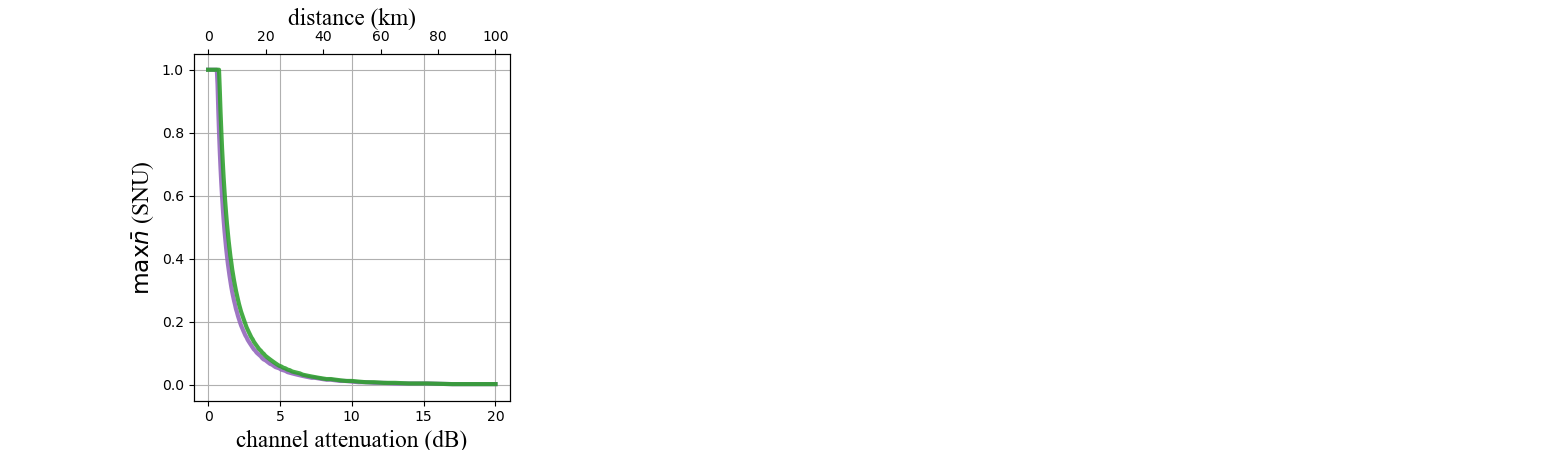

In [12]:
figure_max_noise = plt.figure(figsize = (15.5, 4.5))
figure_max_noise.subplots_adjust(wspace=0.4, hspace=0.7) 
#Secret key fraction plot
axis = figure_max_noise.add_subplot(1, 3, 1)
axis.set_xlabel("channel attenuation (dB)", font=axis_font)
axis.set_ylabel("$\\max{\\bar{n}}$ (SNU)", font=axis_font)
axis_distance = axis.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
axis.grid(True)
#---------------------------------------------------------------------------------------------------
#Coherent states protocol with switching
def plot_coherent_states_switching_max_noise(modulation_variance, beta, switching_probability, persistent_plot):
    V_S = modulation_variance
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    variances_A = [1+V_S, 1+V_S]
    correlations_A = [c_S, c_S]
    kappa = numpy.zeros((len(eta),))
    n_q_max = numpy.zeros((len(eta),))
    n_p_max = numpy.zeros((len(eta),))
    n_q = numpy.linspace(0, 1, 500)
    n_p = numpy.linspace(0, 1, 500)
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa_temp = 0
        k = 0
        while kappa_temp >= 0 and k < len(n_q):
            kappa_temp = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, [n_q[k], n_p[k]], beta, switching_probability=switching_probability)[0]
            k +=1
        n_q_max[j] = n_q[k-1]
        n_p_max[j] = n_p[k-1]      
    if persistent_plot:
        n_lines = len(axis.lines)/2
        alpha = 0.9*numpy.exp(-float(n_lines)/20)
        axis.plot(attenuation_dB, n_q_max, color="tab:purple", linewidth=3, alpha=alpha)
    else:
        axis.lines[0].set_ydata(n_q_max)
#Interactive plot updates
#--------------------------------
def update_coherent_states_switching_max_noise(modulation_variance, error_correction_efficiency, switching_probability, persist):
    persistent_plot = persist == "persistent plot"
    plot_coherent_states_switching_max_noise(modulation_variance, error_correction_efficiency, switching_probability, persistent_plot)
    figure_max_noise.canvas.draw_idle()   
coherent_states_switching_layout = Layout(width='25%', height='40px')
modulation_variance_slider = FloatSlider(min=1e-3, max=20, step=0.2, value=1.17, readout_format='.3f', layout=coherent_states_switching_layout)
beta_slider = FloatSlider(min=0, max=1, step=0.001, value=0.95, readout_format='.3f', layout=coherent_states_switching_layout)
switching_probability_slider = FloatSlider(min=0, max=1, step=0.001, value=0.5, readout_format='.3f', layout=coherent_states_switching_layout)
persist_button = RadioButtons(options=["single plot", "persistent plot"], layout=coherent_states_switching_layout, value="persistent plot")
interact(update_coherent_states_switching_max_noise, modulation_variance=modulation_variance_slider, \
         error_correction_efficiency=beta_slider, \
         switching_probability=switching_probability_slider, persist=persist_button)
#---------------------------------------------------------------------------------------------------
#Squeezed states QKD with squeezed quadrature modulation
def plot_squeezed_states_max_noise(modulation_variance, squeezing_variance, beta, persistent_plot):
    V_S = modulation_variance
    V_sqz = squeezing_variance
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    correlations_A = [0, c_S]
    variances_A = [1/V_sqz, V_sqz+V_S]
    correlations_A = [0, c_S]
    kappa = numpy.zeros((len(eta),))
    n_q_max = numpy.zeros((len(eta),))
    n_p_max = numpy.zeros((len(eta),))
    n_q = numpy.linspace(0, 1, 500)
    n_p = numpy.linspace(0, 1, 500)
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa_temp = 0
        k = 0
        while kappa_temp >= 0 and k < len(n_q):
            kappa_temp = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, [n_q[k], n_p[k]], beta)[0]
            k +=1
        n_q_max[j] = n_q[k-1]
        n_p_max[j] = n_p[k-1]
    if persistent_plot:
        n_lines = len(axis.lines)/2
        alpha = 0.9*numpy.exp(-float(n_lines)/20)
        axis.plot(attenuation_dB, n_q_max, color="tab:green", linewidth=3, alpha=alpha)
    else:
        axis.lines[1].set_ydata(n_q_max)
#Interactive plot updates
#--------------------------------
def update_squeezed_states_max_noise(modulation_variance, squeezing_variance, error_correction_efficiency, persist):
    persistent_plot = persist == "persistent plot"
    plot_squeezed_states_max_noise(modulation_variance, 10**(squeezing_variance/10), error_correction_efficiency, persistent_plot)
    figure_max_noise.canvas.draw_idle()   
squeezed_states_layout = Layout(width='25%', height='40px')
#modulation_variance_slider = FloatSlider(min=1e-3, max=20, step=0.001, value=0.3, readout_format='.3f', layout=squeezed_states_layout)
squeezing_variance_slider = FloatSlider(min=-20, max=0, step=0.001, value=-9, readout_format='.3f', layout=squeezed_states_layout)
#beta_slider = FloatSlider(min=0, max=1, step=0.001, value=1, readout_format='.3f', layout=squeezed_states_layout)
#persist_button = RadioButtons(options=["single plot", "persistent plot"], layout=coherent_states_layout)
interact(update_squeezed_states_max_noise, modulation_variance=modulation_variance_slider, \
         squeezing_variance=squeezing_variance_slider, error_correction_efficiency=beta_slider, persist=persist_button)
plt.show()  

In [16]:
figure_max_noise.savefig("coherent-VS-squeezed_maximum-channel-noise_VS-channel-loss_V_S=1.17_V_sqz=-9dB_beta=0.95.pdf")

## Secret Key Fraction VS (modulation variance, squeezing variance) for the Squeezed States Protocol

interactive(children=(FloatSlider(value=0.8, description='eta', max=1.0, min=1e-06, readout_format='.3f', step…

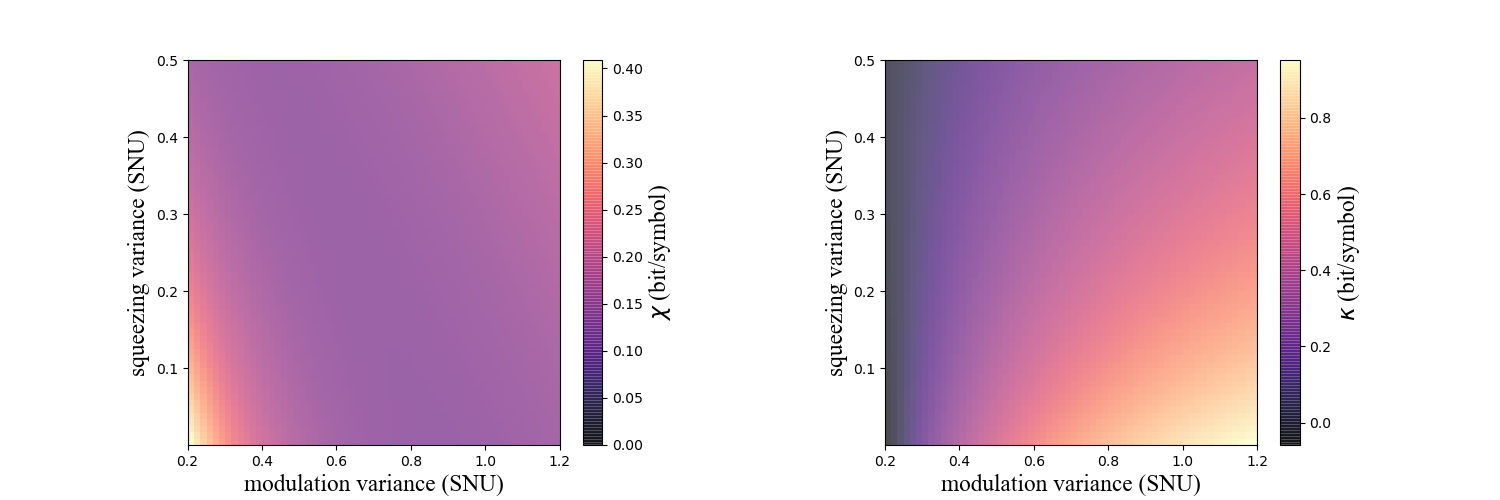

In [14]:
n_points_initial = 60
#Define figure and axes
figure_2D_sqz_mod = plt.figure(figsize = (15, 5))
figure_2D_sqz_mod.subplots_adjust(wspace=0.5, hspace=0.1) 

#Define plot function
def plot(eta, n_q, n_p, n_points):
    figure_2D_sqz_mod.clear()
    V_sqz_array = numpy.linspace(1e-4, 0.5, n_points)
    V_p_S_array = numpy.linspace(0.2, 1.2,n_points)
    #2D plot variables
    V_P_S ,V_SQZ = numpy.meshgrid(V_p_S_array, V_sqz_array)
    holevo_information = numpy.zeros(V_P_S.shape)
    secret_key_fraction = numpy.zeros(V_P_S.shape)
    #Holevo information axis 
    axis_Holevo_information = figure_2D_sqz_mod.add_subplot(1, 2, 1)
    axis_Holevo_information.set_xlabel("modulation variance (SNU)", font=axis_font)
    axis_Holevo_information.set_ylabel("squeezing variance (SNU)", font=axis_font)
    #axis_Holevo_information.grid()
    #Secret key fraction axis
    axis_secret_key_fraction = figure_2D_sqz_mod.add_subplot(1, 2, 2)
    axis_secret_key_fraction.set_xlabel("modulation variance (SNU)", font=axis_font)
    axis_secret_key_fraction.set_ylabel("squeezing variance (SNU)", font=axis_font)
   # axis_secret_key_fraction.grid()
    for j in range(n_points):
        V_sqz = V_sqz_array[-1-j]
        for k in range(n_points):
            V_p_S = V_p_S_array[k]
            C_p_S = V_p_S #symbols/quadrature covariances
            c_p_S = C_p_S/numpy.sqrt(V_p_S) #correlations (not normalized)
            variances_A = [1/V_sqz, V_sqz+V_p_S]
            correlations_A = [0, c_p_S]
            channel_thermal_numbers = [n_q, n_p]
            etas = [eta, eta]
            kappa, I_AB, chi, _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                         etas, channel_thermal_numbers, beta=0.95)
            holevo_information[j, k] = chi
            secret_key_fraction[j, k] = kappa
    #Plot
    min_chi, max_chi = (numpy.min(holevo_information), numpy.max(holevo_information))
    imshow_chi = axis_Holevo_information.imshow(holevo_information, alpha=0.7, cmap=cm.magma, \
                                                norm=matplotlib.colors.Normalize(vmin=0, vmax=max_chi), aspect='auto', \
                                                extent=[V_p_S_array[0], V_p_S_array[-1], V_sqz_array[0], V_sqz_array[-1]])
    colorbar_chi = figure_2D_sqz_mod.colorbar(mappable=imshow_chi, ax=axis_Holevo_information)
    colorbar_chi.set_label("$\chi$ (bit/symbol)", font=axis_font)
    
    min_kappa, max_kappa = (numpy.min(secret_key_fraction), numpy.max(secret_key_fraction))
    imshow_kappa = axis_secret_key_fraction.imshow(secret_key_fraction.astype(float), alpha=0.7, cmap=cm.magma, \
                                                   norm=matplotlib.colors.Normalize(vmin=min_kappa, vmax=max_kappa), aspect='auto',\
                                                   extent=[V_p_S_array[0], V_p_S_array[-1], V_sqz_array[0], V_sqz_array[-1]])
    colorbar_kappa = figure_2D_sqz_mod.colorbar(mappable=imshow_kappa, ax=axis_secret_key_fraction)
    colorbar_kappa.set_label("$\kappa$ (bit/symbol)", font=axis_font)
#Interactive plot functions
def update(eta, n_q, n_p, n_points):
    plot(eta=eta, n_q=n_q, n_p=n_p, n_points=n_points)
    figure_2D_sqz_mod.canvas.draw_idle()
    
interact(update, eta=FloatSlider(min=1e-6, max=1, step=0.001, value=0.8, readout_format='.3f'),\
        n_q=FloatSlider(min=0, max=0.5, step=0.001, value=0.1, readout_format='.3f'),\
        n_p=FloatSlider(min=0, max=0.5, step=0.001, value=0.1, readout_format='.3f'),\
        n_points = IntSlider(min=5, max=100, step=1, value=n_points_initial, readout_format='d'))
plt.show()

In [15]:
figure_2D_sqz_mod.savefig("squeezed_VS-modulation-variance-squeezing-variance_eta=0.8_n_q=n_p=0.1_beta=0.95.pdf")